## Model Setup

Here, we describe the model set up including the grid and the initial conditions.

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

### Generating the Model Files

To generate the files for this model, there is a convenient utility provided in the utils directory of the single_berg example. Simply run the following python script to generate the model input binaries:

```
python create_initial_conditions.py
```

When run from inside the utils directory, this script will generate all of the necessary files inside the input directory.

### Model Grid

This single iceberg model is constructed on a relatively small and simple domain. The model has the following dimensions:

In [43]:
n_rows = 11
n_cols = 11
n_depth_levels = 50

The bathymetry of the model is uniformly 500 m deep except at the enclosed edges of the model domain. Let's read it in and habe a look:

In [44]:
bathymetry = np.fromfile('../../../../example_configs/single_stationary_berg/input/square_bathymetry.bin','>f4').reshape((n_rows,n_cols))

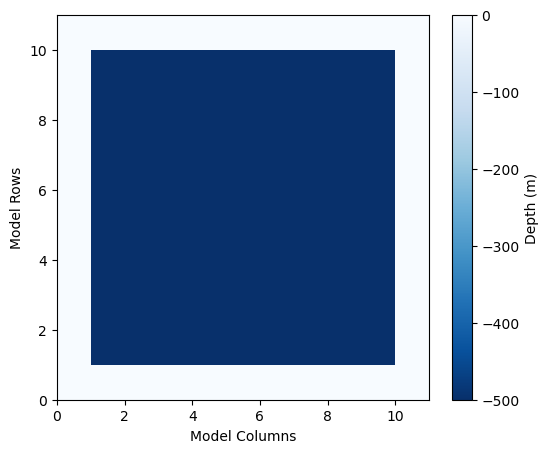

In [45]:
fig = plt.figure(figsize=(6,5))
C = plt.pcolormesh(bathymetry,cmap='Blues_r')
plt.colorbar(C, label='Depth (m)')
plt.xlabel('Model Columns')
plt.ylabel('Model Rows')
plt.show()

The vertical size of the model grid cells telescope with depth such that there is higher resolution near the surface

In [46]:
# vertical cell dimensions defined in the data file
delR = np.array([   1.00,    1.14,    1.30,    1.49,   1.70,
                    1.93,    2.20,    2.50,    2.84,   3.21,
                    3.63,    4.10,    4.61,    5.18,   5.79,
                    6.47,    7.20,    7.98,    8.83,   9.73,
                   10.69,   11.70,   12.76,   13.87,  15.03,
                   16.22,   17.45,   18.70,   19.97,  21.27,
                   22.56,   23.87,   25.17,   26.46,  27.74,
                   29.00,   30.24,   31.45,   32.65,  33.82,
                   34.97,   36.09,   37.20,   38.29,  39.37,
                   40.45,   41.53,   42.62,   43.73,  44.87])

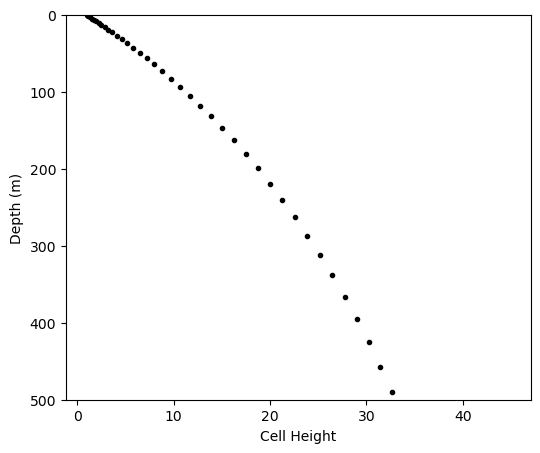

In [47]:
fig = plt.figure(figsize=(6,5))
plt.plot(delR, np.cumsum(delR),'k.')
plt.ylim([500,0])
plt.xlabel('Cell Height')
plt.ylabel('Depth (m)')
plt.show()

### Initial Conditions

The initial conditions (temperature and salinity) are designed to approximate conditions in the northwestern region of Greenland. Let's have a peek at the profiles:

In [48]:
theta_IC = np.fromfile('../../../../example_configs/single_stationary_berg/input/THETA_IC','>f4').reshape((n_depth_levels, n_rows,n_cols))
salt_IC = np.fromfile('../../../../example_configs/single_stationary_berg/input/SALT_IC','>f4').reshape((n_depth_levels, n_rows,n_cols))

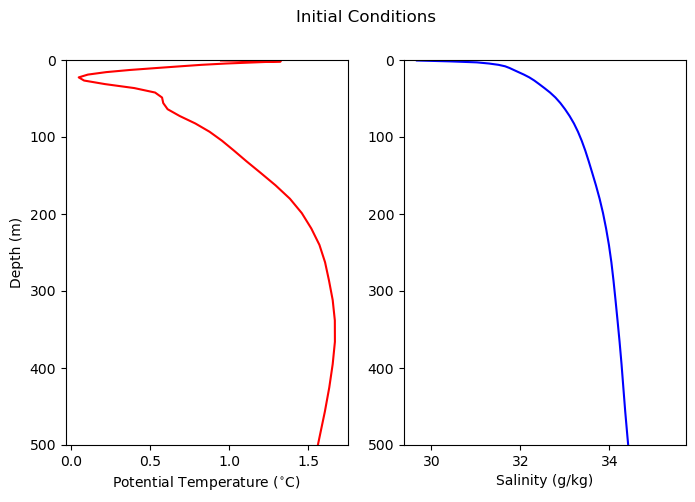

In [49]:
fig = plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(theta_IC[:,5,5], np.cumsum(delR), 'r-')
plt.ylim([500,0])
plt.ylabel('Depth (m)')
plt.xlabel('Potential Temperature ($^{\circ}$C)')

plt.subplot(1,2,2)
plt.plot(salt_IC[:,5,5], np.cumsum(delR), 'b-')
plt.ylim([500,0])
plt.xlabel('Salinity (g/kg)')

plt.suptitle('Initial Conditions')

plt.show()

Note that a ptracer initial condition is also provide but it is identically 0. The tracer is used to trace the meltwater fraction (see the subsequent notebook for results).

### External Forcing Conditions

Just like the initial conditions, the external forcing conditions are designed to approximate conditions in the northwestern region of Greenland. The conditions are provided on 6-hourly timesteps for 366 days:

In [50]:
days = np.arange(366*4)/4

In [51]:
Atemp = np.fromfile('../../../../example_configs/single_stationary_berg/input/exf/Atemp_2016','>f4').reshape((366*4, n_rows,n_cols))
Lwdown = np.fromfile('../../../../example_configs/single_stationary_berg/input/exf/Lwdown_2016','>f4').reshape((366*4, n_rows,n_cols))
Swdown = np.fromfile('../../../../example_configs/single_stationary_berg/input/exf/Swdown_2016','>f4').reshape((366*4, n_rows,n_cols))
Uwind = np.fromfile('../../../../example_configs/single_stationary_berg/input/exf/Uwind_2016','>f4').reshape((366*4, n_rows,n_cols))
Vwind = np.fromfile('../../../../example_configs/single_stationary_berg/input/exf/Vwind_2016','>f4').reshape((366*4, n_rows,n_cols))
SIarea = np.fromfile('../../../../example_configs/single_stationary_berg/input/exf/SIarea_2016','>f4').reshape((366*4, n_rows,n_cols))

Let's peek at the timeseries:

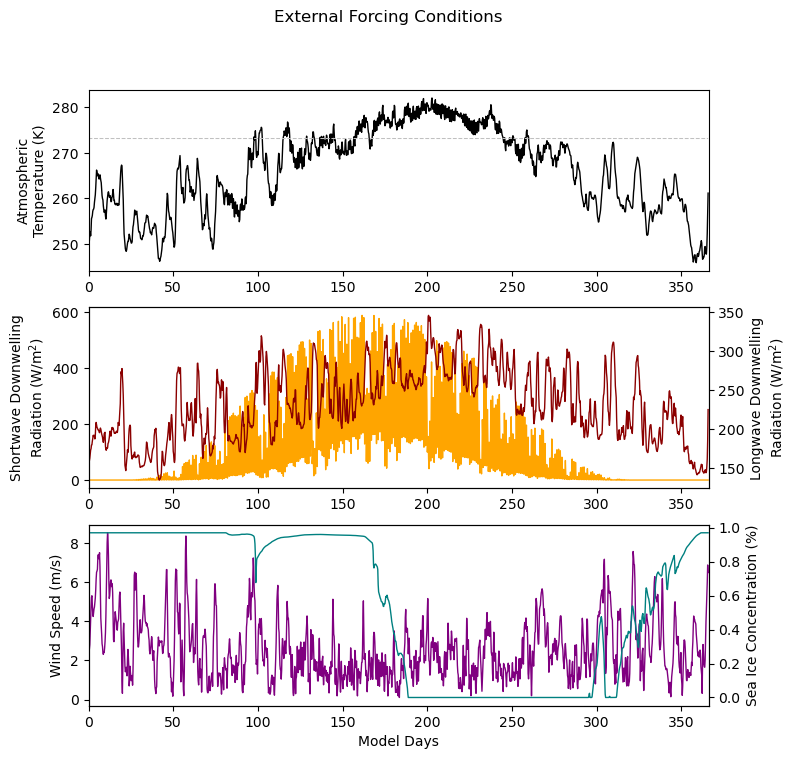

In [52]:
fig = plt.figure(figsize=(8,8))

plt.subplot(3,1,1)
plt.plot(days, Atemp[:,5,5], 'k-', linewidth=1)
plt.plot(days, 273.15*np.ones_like(days), '--', color='silver', linewidth=0.75)
plt.ylabel('Atmospheric\nTemperature (K)')
plt.xlim([0,366])

plt.subplot(3,1,2)
plt.plot(days, Swdown[:,5,5], '-',color='orange', linewidth=1)
plt.ylabel('Shortwave Downwelling\nRadiation (W/m$^2$)')
ax2 = plt.gca().twinx()
ax2.plot(days, Lwdown[:,5,5], '-', color='darkred', linewidth=1)
ax2.set_ylabel('Longwave Downwelling\nRadiation (W/m$^2$)')
plt.xlim([0,366])

plt.subplot(3,1,3)
plt.plot(days, (Uwind[:,5,5]**2+Vwind[:,5,5]**2)**0.5, '-', color='purple', linewidth=1)
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Model Days')
ax2 = plt.gca().twinx()
ax2.plot(days, SIarea[:,5,5], '-', color='teal', linewidth=1)
ax2.set_ylabel('Sea Ice Concentration (%)')
plt.xlim([0,366])

plt.suptitle('External Forcing Conditions')

plt.show()

With these conditions in hand, we are ready to compile and run our model code.